In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [23]:
# setting the global seed of tensorflow to ensure having reproducible results
tf.random.set_seed(42)

## Dataset preparation processes

Importing a dataset 'fashion_mnist' from Keras and splitting the dataset into training data ( data and labels for training) and testing  data ( data and labels for testing)

In [24]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

One Hot encodeing the targets/outputs to get a better prediction

In [25]:
train_labels = tf.one_hot(train_labels, depth=len(set(train_labels)))
test_labels = tf.one_hot(test_labels, depth=len(set(test_labels)))

To feed this data to train a CNN model we have to reshape this list to have a 4 dimensions  where '1' stands for channel dimension, since we have greyscaled images we have to use '1'. If it was RGB it will be '3' each one is representing one color scale.

In [26]:
print("train images shape before reshaping: ", train_images.shape)
print("test images shape before reshaping: ", test_images.shape)

train images shape before reshaping:  (60000, 28, 28)
test images shape before reshaping:  (10000, 28, 28)


In [27]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_images= test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

In [28]:
print("train images shape after reshaping: ", train_images.shape)
print("test images shape after reshaping: ", test_images.shape)

train images shape after reshaping:  (60000, 28, 28, 1)
test images shape after reshaping:  (10000, 28, 28, 1)


Implementing 'tf.data' API pipelines


In [29]:
def data_api(images, labels):
    data = tf.data.Dataset.from_tensor_slices((images, labels)) # get the slices of the array in the form of objects
    data = data.shuffle(60000, seed=42)
    data = data.batch(32) # setting batch size to '32'
    data = data.prefetch(tf.data.experimental.AUTOTUNE) # overlaps the preprocessing and model execution of a training step and automatically tuning the Neural Networks
    return data


In [30]:
train_dataset = data_api(train_images, train_labels)
test_dataset = data_api(test_images, test_labels)

## 1/ Building and Training Fully Connected Network (FCN/DNN)

In [ ]:
# to restart tensorflow state
del tf
import tensorflow as tf
tf.random.set_seed(42)

In [ ]:
DNN_model = tf.keras.Sequential([
                                 tf.keras.layers.Input(shape=[28,28,1]), # input layer
                                 tf.keras.layers.Flatten(), # removes all of the dimensions except for one
                                 tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                 tf.keras.layers.Dropout(0.2), # using regularization technique to avoid overfitting
                                 tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                 tf.keras.layers.Dropout(0.13),
                                 tf.keras.layers.Dense(10, activation=tf.nn.softmax) # output layer
])

Using accuracy metric and loss function in the compile function to display training/validation accuracy during training

In [ ]:
DNN_model.compile(optimizer='Adam', loss=tf.losses.CategoricalCrossentropy(), metrics='acc')

In [ ]:
DNN_model.fit(train_dataset,epochs=50,validation_data=(test_dataset))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 5.9167 - acc: 0.2823 - val_loss: 1.2801 - val_acc: 0.4837
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3802 - acc: 0.4656 - val_loss: 1.0747 - val_acc: 0.5493
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1960 - acc: 0.5227 - val_loss: 1.0002 - val_acc: 0.5654
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0886 - acc: 0.5672 - val_loss: 0.7834 - val_acc: 0.7080
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9159 - acc: 0.6503 - val_loss: 0.6982 - val_acc: 0.7347
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8546 - acc: 0.6772 - val_loss: 0.6683 - val_acc: 0.7481
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8184 - acc: 0.6951 - val_loss: 0.6456 - val_acc: 0.7707
Epoch 8/50
1875/1875 [==============================] - 5s 3ms

Plotting the loss/validation loss value over the training epochs

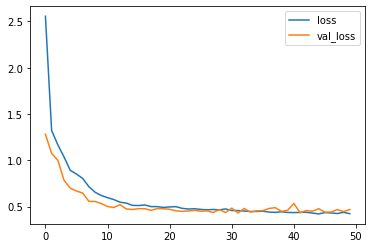

In [ ]:
DNN_fit_history = pd.DataFrame(DNN_model.history.history)
DNN_fit_history[['loss', 'val_loss']].plot.line()

## 2/ Building and Training Convolutional Neural Network (CNN)

In [ ]:
# to restart tensorflow state
del tf
import tensorflow as tf
tf.random.set_seed(42)

In [ ]:
CNN_model = tf.keras.Sequential([
              tf.keras.Input(shape=[28,28,1]), # input layer
              tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu),
              tf.keras.layers.BatchNormalization(), # so that noise due to mini-batch can be ignored
              tf.keras.layers.MaxPool2D((2,2)), # downsamples the input representation by taking the maximum value over the window '(2,2)'
              tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.MaxPool2D((2,2)), 
              tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Dropout(0.2), # using regularization technique to avoid overfitting


              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation=tf.nn.relu, bias_regularizer='l2', kernel_regularizer='l2', activity_regularizer='l2'), # using regularizers 
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(64, activation=tf.nn.relu, bias_regularizer='l2', kernel_regularizer='l2', activity_regularizer='l2'),
              tf.keras.layers.Dropout(0.1),
              tf.keras.layers.Dense(10, activation=tf.nn.softmax) # output layer
])

Using accuracy metric and loss function in the compile function to display training/validation accuracy during training

In [ ]:
CNN_model.compile(optimizer='Adam', loss=tf.losses.CategoricalCrossentropy(), metrics='acc')

In [ ]:
CNN_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2061 - acc: 0.6983 - val_loss: 0.6298 - val_acc: 0.8738
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6031 - acc: 0.8821 - val_loss: 0.4918 - val_acc: 0.9000
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4981 - acc: 0.9009 - val_loss: 0.4404 - val_acc: 0.9029
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4304 - acc: 0.9134 - val_loss: 0.4118 - val_acc: 0.9121
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3896 - acc: 0.9226 - val_loss: 0.4242 - val_acc: 0.9025
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3596 - acc: 0.9291 - val_loss: 0.4130 - val_acc: 0.9070
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3475 - acc: 0.9313 - val_loss: 0.3816 - val_acc: 0.9116
Epoch 8/100
1875/1875 [==============================]

Plotting the loss/validation loss value over the training epochs

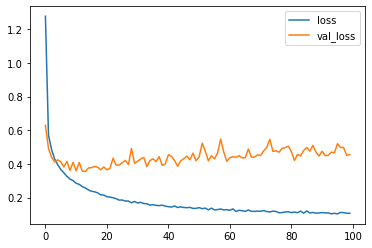

In [ ]:
CNN_fit_history = pd.DataFrame(CNN_model.history.history)
CNN_fit_history[['loss', 'val_loss']].plot.line()